<a href="https://colab.research.google.com/github/jvallalta/ia3/blob/main/Autoencoder_ciphar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder convolucional CIPHAR-10 sección

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size=32
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [6]:
import torch.nn as nn
import torch.nn.functional as F


class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.enc1 = nn.Conv2d(3, 8, 3)
        self.enc2 = nn.Conv2d(8, 4, 3)
        self.dec1 = nn.ConvTranspose2d(4, 8, 3)
        self.dec2 = nn.ConvTranspose2d(8, 3, 3)

    def forward(self, x):
        x = F.relu(self.enc1(x))
        x = F.relu(self.enc2(x))
        x = F.relu(self.dec1(x))
        x = F.relu(self.dec2(x))
        return x


autoencoder = Autoencoder().to(device)

In [8]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

In [12]:
# Training

# optional: measure time
import time

autoencoder.train()
train_loss=[]
epochs=10
start_time = time.time()

for epoch in range(epochs):  # loop over the dataset multiple times
    
    running_loss = 0.0
    for data in trainloader:
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        # loss is returned as an average over the batch_size: undo average
        running_loss += loss.item() * inputs.size(0)

    loss = running_loss / len(trainloader) # average over number of batches
    train_loss.append(loss)
    print('epoch [%d/%d] loss: %.3f' %
                (epoch + 1, epochs, loss))

print('Finished Training')
print("Elapsed time: %s seconds" % (time.time() - start_time))

epoch [1/10] loss: 4.948
epoch [2/10] loss: 4.675
epoch [3/10] loss: 4.646
epoch [4/10] loss: 4.632
epoch [5/10] loss: 4.624
epoch [6/10] loss: 4.619
epoch [7/10] loss: 4.617
epoch [8/10] loss: 4.612
epoch [9/10] loss: 4.610
epoch [10/10] loss: 4.608
Finished Training
Elapsed time: 136.23339700698853 seconds


(Text(0, 0.5, 'Train loss'), Text(0.5, 0, 'epoch'))

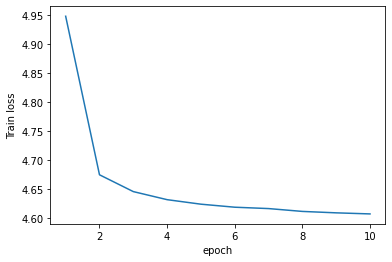

In [14]:
#Visualizamos imágenes
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(1,epochs+1), train_loss)
plt.ylabel('Train loss'), plt.xlabel('epoch')

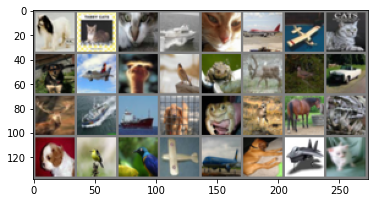

  dog   cat   cat  ship   cat plane plane   cat   dog plane  bird  bird  frog  deer  bird   car  deer  ship  ship   dog  frog  deer horse  frog   dog  bird  bird plane plane   dog plane   cat


In [44]:
import matplotlib.pyplot as plt
import numpy as np

# function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
images, labels = images.to(device), labels.to(device)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(labels.size(0))))

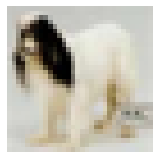

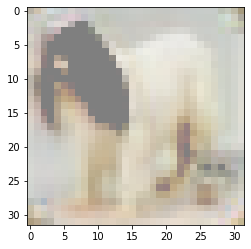

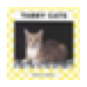

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


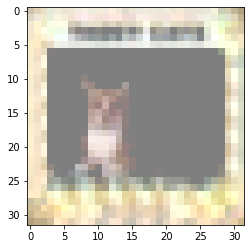

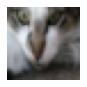

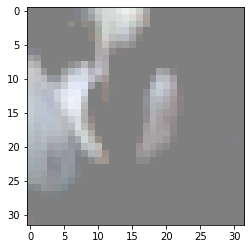

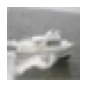

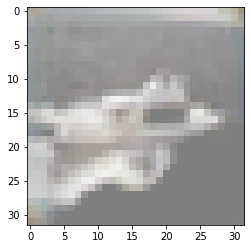

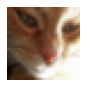

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


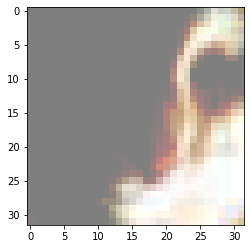

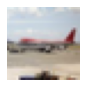

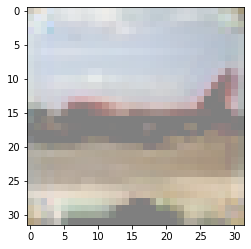

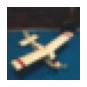

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


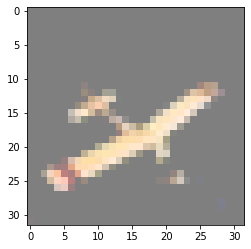

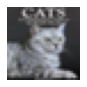

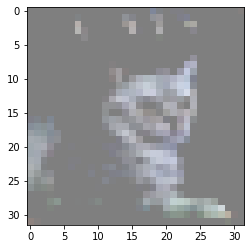

In [49]:
autoencoder.eval()

outputs = autoencoder(images)

fig = plt.figure(figsize=(12,12))
#fig.subplots_adjust(wspace=0.5, hspace=0.5)
num_images = 8
for index in range(1, num_images+1):
  plt.subplot(2,4, index)
  plt.axis('off')
  img = images[index-1] / 2 + 0.5     # unnormalize
  npimg = img.cpu().numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

  out = outputs[index-1]/2 + 0.5
  outnp = out.cpu().detach().numpy()
  plt.imshow(np.transpose(outnp, (1,2,0)))
  plt.show()
  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


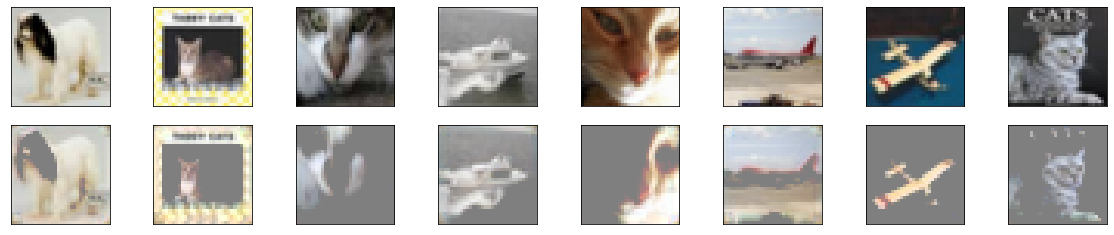

In [54]:
# Mostrar imágenes de entrada y el resultado luego de aplicar el Autocodificador (Figura 4)
n = 8
plt.figure(figsize=(20, 4))
for i in range(n):
    # mostrar originales
    ax = plt.subplot(2, n, i+1)
    img = images[i] / 2 + 0.5     # unnormalize
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # mostrar imágenes tras remover el ruido
    ax = plt.subplot(2, n, i + n+1)
    out = outputs[i]/2 + 0.5
    outnp = out.cpu().detach().numpy()
    plt.imshow(np.transpose(outnp, (1,2,0)))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()